In [48]:
#import dependencies

import requests
import json
import matplotlib.pyplot as plt
from citipy import citipy
from scipy.stats import linregress
import pandas as pd
import csv
import random as rand
import scipy.stats as st
from config import api_key

# Use this url when passing lat/long
# url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&lat="

# Use this url when passing city name
url = "http://api.openweathermap.org/data/2.5/weather?q="

In [49]:
#use the random module to generate lat and long for 500 cities, return city name from citipy
city_list = []

for i in range(500):
    random_lat = round(rand.uniform(-90, 90),4)
    random_long = round(rand.uniform(-180, 180),4)
    city_name = citipy.nearest_city(random_lat, random_long).city_name.title()
    city_list.append(city_name)

In [50]:
#create empty lists to use in for loop
cities = []
latitudes = []
longitudes = []
temperatures = []
humid = []
cloud = []
wind = []

# #use the random module to generate lat and long for 500 cities
# for i in range(500):
#     try:
#         random_lat = round(rand.uniform(-70, 70),4)
#         random_long = round(rand.uniform(-100, 100),4)

#         # Partial query URL for passing lat/long
#         query_url = f"{url}{random_lat}&lon={random_long}&appid={api_key}"

#use the random module to generate lat and long for 500 cities, return city name from citipy
for city in city_list:
    try:
        
        # Partial query URL for passing city name
        query_url = f"{url}{city}&appid={api_key}&units=imperial"
        
        
        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

        #get metrics from weather data api to use in list
        name = weather_json["name"]
        lat = weather_json["coord"]["lat"]
        long = weather_json["coord"]["lon"]
        temperature = weather_json["main"]["temp"]
        humidity = weather_json["main"]["humidity"]
        cloudiness = weather_json["clouds"]["all"]
        wind_speed = weather_json["wind"]["speed"]

        #append values to individual lists to use in df
        cities.append(name)
        latitudes.append(lat)
        longitudes.append(long)
        temperatures.append(temperature)
        humid.append(humidity)
        cloud.append(cloudiness)
        wind.append(wind_speed)
        print(f"Getting weather data for {name}.")
    except KeyError:
        pass


Getting weather data for The Valley.
Getting weather data for Vaini.
Getting weather data for Ponta Delgada.
Getting weather data for Tiznit Province.
Getting weather data for Port Lincoln.
Getting weather data for Bethel.
Getting weather data for Castro.
Getting weather data for Laguna.
Getting weather data for Oyama.
Getting weather data for College.
Getting weather data for Busselton.
Getting weather data for Lydenburg.
Getting weather data for Tasiilaq.
Getting weather data for Ahipara.
Getting weather data for Hong Kong.
Getting weather data for Nikolskoye.
Getting weather data for Sur.
Getting weather data for Dickinson.
Getting weather data for Mount Isa.
Getting weather data for Petukhovo.
Getting weather data for Winslow.
Getting weather data for Port Blair.
Getting weather data for Rikitea.
Getting weather data for Puerto Ayora.
Getting weather data for Aromashevo.
Getting weather data for Vaini.
Getting weather data for Kīhei.
Getting weather data for Cape Town.
Getting weat

Getting weather data for Kjøpsvik.
Getting weather data for Ambilobe.
Getting weather data for Kapaa.
Getting weather data for Rikitea.
Getting weather data for Busselton.
Getting weather data for Port Elizabeth.
Getting weather data for Kapaa.
Getting weather data for Paamiut.
Getting weather data for Chokurdakh.
Getting weather data for Beipiao.
Getting weather data for Thompson.
Getting weather data for Rikitea.
Getting weather data for Saint Anthony.
Getting weather data for Ushuaia.
Getting weather data for Hong Kong.
Getting weather data for Pevek.
Getting weather data for Lebu.
Getting weather data for Broken Hill.
Getting weather data for Kruisfontein.
Getting weather data for Hermanus.
Getting weather data for Alta Floresta.
Getting weather data for Balkanabat.
Getting weather data for Jalu.
Getting weather data for Boca do Acre.
Getting weather data for Lebu.
Getting weather data for Miyang.
Getting weather data for Hobart.
Getting weather data for Mataura.
Getting weather da

In [51]:
df = pd.DataFrame({
    "City": cities, 
    "Lat": latitudes, 
    "Long": longitudes,
    "Temp": temperatures, 
    "Humidity": humid,
    "Cloudiness": cloud,
    "Wind": wind
})
#len(df)
df.head()

,City,Lat,Long,Temp,Humidity,Cloudiness,Wind
0,The Valley,18.2170,-63.0578,79.63,69,40,17.27
1,Vaini,-21.2000,-175.2000,75.20,94,90,10.36
2,Ponta Delgada,37.7333,-25.6667,61.41,77,75,20.71
3,Tiznit Province,29.5833,-9.5000,59.43,55,0,5.12
4,Port Lincoln,-34.7333,135.8667,63.73,76,62,15.52


# The first requirement is to create a series of scatter plots to showcase the following relationships. 

## After each plot, add a sentence or two explaining what the code is analyzing.

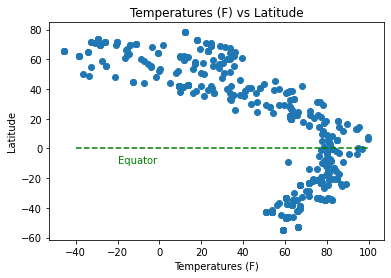

In [52]:
#Temperature (F) vs. Latitude
#---------------------------------------------------------------
plt.scatter(df['Temp'],df['Lat'])
plt.xlabel("Temperatures (F)")
plt.ylabel("Latitude")
plt.title("Temperatures (F) vs Latitude")

x_coordinates = [-40, 100]
y_coordinates = [0, 0]
equator = plt.plot(x_coordinates, y_coordinates, linestyle="dashed", color="green")
plt.annotate("Equator",(-20,-10),fontsize=10,color="green")

plt.show()

The Equator is depicted on the graph as y = 0. The temperatures increase as latitudes approach the Equator

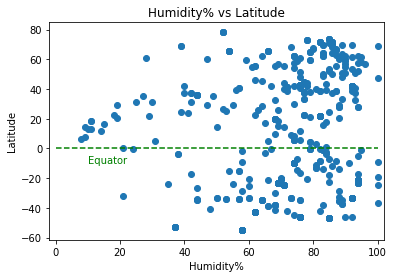

In [53]:
#Humidity (%) vs. Latitude
#---------------------------------------------------------------

plt.scatter(df['Humidity'],df['Lat'])
plt.xlabel("Humidity%")
plt.ylabel("Latitude")
plt.title("Humidity% vs Latitude")
plt.xlim(-2, 102)

x_coordinates = [0, 100]
y_coordinates = [0, 0]
equator = plt.plot(x_coordinates, y_coordinates, linestyle="dashed", color="green")
plt.annotate("Equator",(10,-10),fontsize=10,color="green")

plt.show()

The Equator is depicted on the graph as y = 0. The humidity increases as latitudes approach the Equator.

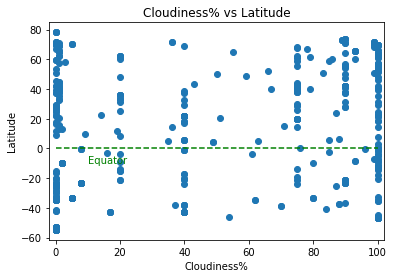

In [54]:
#Cloudiness (%) vs. Latitude
#---------------------------------------------------------------

plt.scatter(df['Cloudiness'],df['Lat'])
plt.xlabel("Cloudiness%")
plt.ylabel("Latitude")
plt.title("Cloudiness% vs Latitude")
plt.xlim(-2, 102)

x_coordinates = [0, 100]
y_coordinates = [0, 0]
equator = plt.plot(x_coordinates, y_coordinates, linestyle="dashed", color="green")
plt.annotate("Equator",(10,-10),fontsize=10,color="green")

plt.show()

This graph shows cloudiness % compared to latitude. The plots appear to be distributed throughout the graph. There does not seem to be a relationship between cloudiness and distance from the Equator.

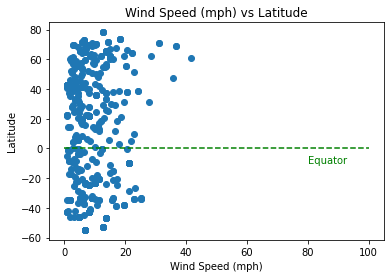

In [55]:
#Wind Speed (mph) vs. Latitude
#---------------------------------------------------------------

plt.scatter(df['Wind'],df['Lat'])
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.title("Wind Speed (mph) vs Latitude")

x_coordinates = [0, 100]
y_coordinates = [0, 0]
equator = plt.plot(x_coordinates, y_coordinates, linestyle="dashed", color="green")
plt.annotate("Equator",(80,-10),fontsize=10,color="green")

plt.show()

The wind speeds at latitudes near the Equator appear to be slightly less than those further away from the Equator. Between latitude ranges -20 to 20 the wind speeds are range from 0 to 30. Beyond -20 and 20 wind speeds reach up to 45mph with one outlier around 65mph.

# The second requirement is to run linear regression on each relationship. 
This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude).

After each pair of plots, take the time to explain what the linear regression is modeling. 
For example, describe any relationships you notice and any other analysis you may have.

Save a CSV of all retrieved data and a PNG image for each scatter plot.

In [56]:
#Northern Hemisphere dataframe where latitude is greater than or equal to 0
df_north = df.loc[df["Lat"]>=0]

#Southern Hemisphere dataframe where latitude is less than 0
df_south = df.loc[df["Lat"]<0]

The correlation between Temp and Lat in the North Hemi is -0.84


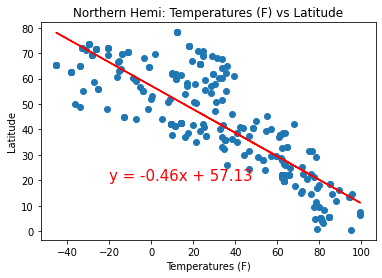

The correlation between Temp and Lat in the South Hemi is 0.78


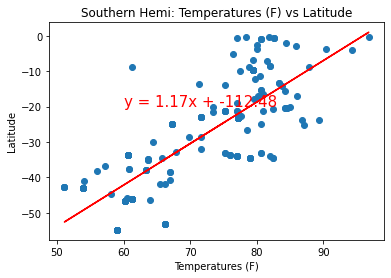

In [62]:
# Add the linear regression equation and line to plot
# Northern Hemisphere - Temperature (F) vs. Latitude

x_values = df_north['Temp']
y_values = df_north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,20),fontsize=15,color="red")
plt.xlabel("Temperatures (F)")
plt.ylabel("Latitude")
plt.title("Northern Hemi: Temperatures (F) vs Latitude")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between Temp and Lat in the North Hemi is {round(correlation[0],2)}")
plt.savefig("images/north_hemi_temperatures.png")
plt.show()

# Southern Hemisphere - Temperature (F) vs. Latitude

x_values = df_south['Temp']
y_values = df_south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,-20),fontsize=15,color="red")
plt.xlabel("Temperatures (F)")
plt.ylabel("Latitude")
plt.title("Southern Hemi: Temperatures (F) vs Latitude")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between Temp and Lat in the South Hemi is {round(correlation[0],2)}")

plt.savefig("images/south_hemi_temperatures.png")
plt.show()

As you get closer to the Equator, latitude decreases and temperature increases. The correlation for the Northern Hemisphere is -0.85 and Southern Hemisphere is 0.89. The regression line visibly shows the relationship as well. On the Northern Hemisphere plot, the line directs down indicating temperature increasing as latitude decreases, or gets closer to the Equator. On the Southern Hemisphere plot, the line directs up indicating temperature increasing as latitude increases, or gets closer to the Equator.

The correlation between Humidity and Lat in the North Hemi is 0.34


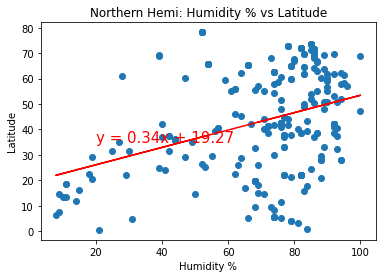

The correlation between Humidity and Lat in the South Hemi is 0.25


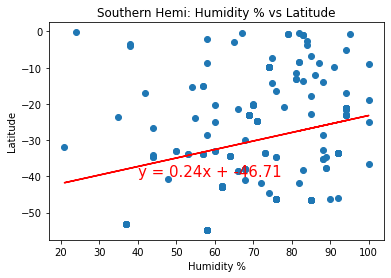

In [58]:
# Northern Hemisphere - Humidity (%) vs. Latitude
x_values = df_north['Humidity']
y_values = df_north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.xlabel("Humidity %")
plt.ylabel("Latitude")
plt.title("Northern Hemi: Humidity % vs Latitude")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between Humidity and Lat in the North Hemi is {round(correlation[0],2)}")

plt.savefig("images/north_hemi_humidity.png")
plt.show()

# Southern Hemisphere - Humidity (%) vs. Latitude
x_values = df_south['Humidity']
y_values = df_south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,-40),fontsize=15,color="red")
plt.xlabel("Humidity %")
plt.ylabel("Latitude")
plt.title("Southern Hemi: Humidity % vs Latitude")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between Humidity and Lat in the South Hemi is {round(correlation[0],2)}")

plt.savefig("images/south_hemi_humidity.png")
plt.show()

While the relationship between humidity and latitude is not as strong as temperature and latitude, one still appears to exist. As you get closer to the Equator, latitude decreases and humidity decreases. The correlation for the Northern Hemisphere is 0.45 and Southern Hemisphere is -0.43. The regression line visibly shows the relationship as well. On the Northern Hemisphere plot, the line directs up indicating humidity increasing as latitude increases, or gets further from the Equator. On the Southern Hemisphere plot, the line directs down indicating humidity increasing as latitude decreases, or gets further from the Equator.

The correlation between Cloudiness and Lat in the North Hemi is 0.08


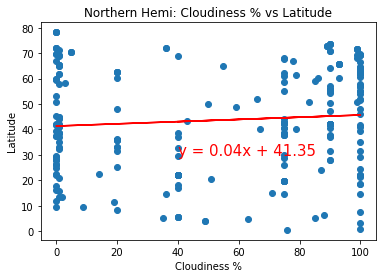

The correlation between Cloudiness and Lat in the South Hemi is 0.15


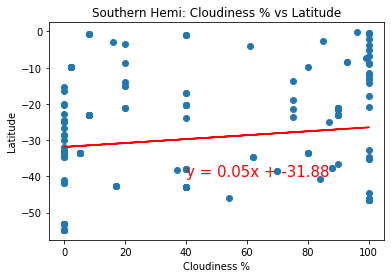

In [59]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
x_values = df_north['Cloudiness']
y_values = df_north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.xlabel("Cloudiness %")
plt.ylabel("Latitude")
plt.title("Northern Hemi: Cloudiness % vs Latitude")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between Cloudiness and Lat in the North Hemi is {round(correlation[0],2)}")

plt.savefig("images/north_hemi_cloudiness.png")
plt.show()

#Southern Hemisphere - Cloudiness (%) vs. Latitude
x_values = df_south['Cloudiness']
y_values = df_south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,-40),fontsize=15,color="red")
plt.xlabel("Cloudiness %")
plt.ylabel("Latitude")
plt.title("Southern Hemi: Cloudiness % vs Latitude")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between Cloudiness and Lat in the South Hemi is {round(correlation[0],2)}")

plt.savefig("images/south_hemi_cloudiness.png")
plt.show()

The scatter plots for both Northern and Southern Hemisphere graphs on cloudiness compared to latitude is not statistically significant. The regression lines on both charts are near flat, or horizontal. The correlation for both the Northern and Southern Hemispheres is 0.26 and -0.15 respectively. Distance from the Equator does not appear to have an effect on cloudiness. 

The correlation between wind speed and lat in the North Hemi is 0.2


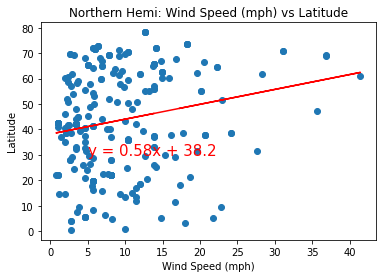

The correlation between wind speed and lat in the South Hemi is 0.04


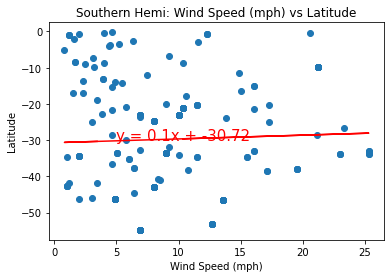

In [60]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = df_north['Wind']
y_values = df_north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.title("Northern Hemi: Wind Speed (mph) vs Latitude")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between wind speed and lat in the North Hemi is {round(correlation[0],2)}")

plt.savefig("images/north_hemi_windspeed.png")
plt.show()

#Southern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = df_south['Wind']
y_values = df_south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,-30),fontsize=15,color="red")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.title("Southern Hemi: Wind Speed (mph) vs Latitude")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between wind speed and lat in the South Hemi is {round(correlation[0],2)}")

plt.savefig("images/south_hemi_windspeed.png")
plt.show()

Wind speeds in the Southern Hemisphere appear to have more of a direct correlation with distance from the Equator than the wind speeds in the North Hemisphere. While the correlation in the Northern Hemisphere is only 0.19, the correlation in the Southern Hemisphere is -0.46. The slope of the regression line is also more pronounced in the Southern Hemisphere at -0.97 while the North is 0.4.

In [61]:
#export dataframes to csv files

df.to_csv("./Resources/orig_weather_data.csv")
df_north.to_csv("./Resources/northHemi_weather_data.csv")
df_south.to_csv("./Resources/southHemi_weather_data.csv")